In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from urllib.parse import urljoin

In [6]:
from bs4 import BeautifulSoup as bs
import pandas as pd
import re

In [22]:
pd.set_option('display.float_format', '{:.2f}'.format)

# _**<span style="color: red;">Obtención de datos</span>**_

#### _<span style="color: blue;">Para obtener los datos que alimentaran nuestra base de datos haremos web scraping de una web del sector inmoviliario. En este caso será flat.mx</span>_

In [7]:
#Iniciamos la carga de la web
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
url = "https://www.flat.mx/venta/propiedades-en-ciudad-de-mexico?geo%5Blat%5D=19.489192010466628&geo%5Blng%5D=-101.69042326397911&geo%5Bzoom%5D=6&geo%5Bp1_lat%5D=25.454999950525192&geo%5Bp1_lng%5D=-96.38402677960411&geo%5Bp2_lat%5D=13.295356594402282&geo%5Bp2_lng%5D=-106.99681974835411&sourceType=others"
driver.get(url)

In [39]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import re

def navigate_and_scrape_flat_pages():
    # Configuración inicial del WebDriver de Selenium
    driver = webdriver.Chrome()

    # URL base para empezar
    base_url = "https://www.flat.mx/venta/propiedades-en-ciudad-de-mexico"

    # Listas para guardar los datos
    alcaldias = []
    precios = []
    baños = []
    cuartos = []
    construcciones = []

    # Cambiaremos y scrappearemos las páginas en el rsngo dado
    for page in range(1, 621):  # Cambiar el rango según la cantidad de páginas
        current_url = f"{base_url}?page={page}&geo%5Blat%5D=19.489192010466628&geo%5Blng%5D=-101.69042326397911&geo%5Bzoom%5D=6&geo%5Bp1_lat%5D=25.454999950525192&geo%5Bp1_lng%5D=-96.38402677960411&geo%5Bp2_lat%5D=13.295356594402282&geo%5Bp2_lng%5D=-106.99681974835411&sourceType=others"
        driver.get(current_url)
        time.sleep(0.5)  # Espera para cargar la página
        soup = BeautifulSoup(driver.page_source, 'html.parser')

        divs = soup.find_all("div", attrs={"class": "flex grow flex-col"})
        for casa in divs:
            ubicacion = casa.find("p", attrs={"class": "truncate font-source text-xs text-dark-grey-1 md:text-sm"})
            if ubicacion:
                alcaldias.append(ubicacion.text)

            valor = casa.find("p", attrs={"class": "flex items-center gap-[0.625rem] truncate font-montserrat text-sm font-bold tabular-nums text-emerald md:text-base"})
            if valor:
                precios.append(valor.text)

            # Extracción de datos adicionales de baños, cuartos y metros cuadrados
            elements = casa.find_all('p', class_='flex shrink-0 flex-nowrap items-center')
            for element in elements:
                title = element.get('title')
                if title:
                    # Extraer y añadir número de baños
                    match = re.search(r'(\d+)\s*baño(s)?', title, re.IGNORECASE)
                    if match:
                        baños.append(int(match.group(1)))

                    # Extraer y añadir número de recámaras
                    match = re.search(r'(\d+)\s*(recámara(s)?|récamara(s)?)', title, re.IGNORECASE)
                    if match:
                        cuartos.append(int(match.group(1)))

                    # Extraer y añadir metros cuadrados
                    match = re.search(r'(\d+)\s*metros cuadrados', title, re.IGNORECASE)
                    if match:
                        construcciones.append(int(match.group(1)))

    driver.quit()

    # Retorna las listas al final de la función
    return alcaldias, precios, baños, cuartos, construcciones

# Llamando a la función y capturando los datos retornados
if __name__ == '__main__':
    alcaldias, precios, baños, cuartos, construcciones = navigate_and_scrape_flat_pages()
    print("Cantidad de alcaldías scrapeadas:", len(alcaldias))
    print("Cantidad de precios scrapeados:", len(precios))
    print("Cantidad de baños scrapeados:", len(baños))
    print("Cantidad de cuartos scrapeados:", len(cuartos))
    print("Cantidad de metros cuadrados scrapeados:", len(construcciones))


Cantidad de alcaldías scrapeadas: 12400
Cantidad de precios scrapeados: 12400
Cantidad de baños scrapeados: 12400
Cantidad de cuartos scrapeados: 12400
Cantidad de metros cuadrados scrapeados: 12400


In [45]:
primer_df = pd.DataFrame({"Valor":precios,"m² construcción":construcciones,"Cuartos":cuartos,"Baños":baños,"Ubicación":alcaldias})
primer_df

,Valor,m² construcción,Cuartos,Baños,Ubicación
0,"$8,200,000",361,4,4,"Naucalpan de Juárez, Ciudad de México"
1,"$1,250,000",54,2,1,"Coyoacán, Ciudad de México"
2,"$6,350,000",287,4,3,"Azcapotzalco, Ciudad de México"
3,"$3,950,000",219,3,2,"Naucalpan de Juárez, Ciudad de México"
4,"$4,300,000",104,2,2,"Benito Juárez, Ciudad de México"
...,...,...,...,...,...
16475,"$3,800,000",422,9,7,"Chimalhuacán, Ciudad de México"
16476,"$4,900,000",276,14,2,"Xochimilco, Ciudad de México"
16477,"$5,100,000",275,3,3,"Tlalpan, Ciudad de México"
16478,"$4,250,000",290,3,2,"Tepetlaoxtoc, Ciudad de México"


In [25]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import re

def navigate_and_scrape_flat_pages():
    # Configuración inicial del WebDriver de Selenium
    driver = webdriver.Chrome()

    # URL base para empezar
    base_url = "https://www.flat.mx/venta/propiedades-en-ciudad-de-mexico"

    # Listas para guardar los datos
    estacionamientos = []

    # Cambiaremos y scrappearemos desde la página 1 a la página 3
    for page in range(1, 621):  # Cambiar el rango según la cantidad de páginas
        current_url = f"{base_url}?page={page}&geo%5Blat%5D=19.489192010466628&geo%5Blng%5D=-101.69042326397911&geo%5Bzoom%5D=6&geo%5Bp1_lat%5D=25.454999950525192&geo%5Bp1_lng%5D=-96.38402677960411&geo%5Bp2_lat%5D=13.295356594402282&geo%5Bp2_lng%5D=-106.99681974835411&sourceType=others"        
        driver.get(current_url)
        time.sleep(0.5)  # Espera para cargar la página
        soup = BeautifulSoup(driver.page_source, 'html.parser')

        divs = soup.find_all("div", attrs={"class": "flex grow flex-col"})
        for casa in divs:

            # Procesamiento de estacionamientos
            parking_info = casa.find_all('p')
            total_p_tags = len(parking_info)
            p_tags_con_estacionamiento = 4
            encontrado = False

            if total_p_tags < p_tags_con_estacionamiento:
                estacionamientos.append(0)
            else:
                for element in parking_info:
                    if re.search(r'\bestacionamiento(s)?\b', element.get('title', ''), re.I):
                        parking_number_span = element.find('span')
                        if parking_number_span and parking_number_span.text.isdigit():
                            num_parking = int(parking_number_span.text.strip())
                            estacionamientos.append(num_parking)
                            encontrado = True
                            break
                        else:
                            estacionamientos.append(0)
                            encontrado = True
                            break

            if not encontrado:
                estacionamientos.append(0)

    driver.quit()

    # Retorna las listas al final de la función
    return estacionamientos

# Llamando a la función y capturando los datos retornados
if __name__ == '__main__':
    alcaldias, precios, estacionamientos = navigate_and_scrape_flat_pages()
    print("Cantidad de estacionamientos scrapeados:", len(estacionamientos))


Cantidad de estacionamientos scrapeados: 12400


In [43]:
df.to_csv('df_casas.csv', index=False)

In [41]:
df = pd.DataFrame({"Valor":precios,"m² construcción":construcciones,"Cuartos":cuartos,"Baños":baños,"Estacionamientos":estacionamientos,"Ubicación":alcaldias})

,Valor,m² construcción,Cuartos,Baños,Estacionamientos,Ubicación
0,"$8,200,000",361,4,4,5,"Naucalpan de Juárez, Ciudad de México"
1,"$1,250,000",54,2,1,1,"Coyoacán, Ciudad de México"
2,"$6,350,000",287,4,3,2,"Azcapotzalco, Ciudad de México"
3,"$3,950,000",219,3,2,2,"Naucalpan de Juárez, Ciudad de México"
4,"$4,300,000",104,2,2,2,"Benito Juárez, Ciudad de México"
...,...,...,...,...,...,...
12395,"$4,500,000",280,3,1,10,"Tlalnepantla de Baz, Ciudad de México"
12396,"$4,100,000",400,12,6,5,"Nezahualcóyotl, Ciudad de México"
12397,"$2,900,000",353,11,9,0,"Tlalnepantla de Baz, Ciudad de México"
12398,"$4,800,000",244,3,3,8,"Jilotzingo, Ciudad de México"


In [16]:
df = pd.read_csv('df_casas.csv')
df

,Valor,m² construcción,Cuartos,Baños,Estacionamientos,Ubicación
0,"$8,200,000",361,4,4,5,"Naucalpan de Juárez, Ciudad de México"
1,"$1,250,000",54,2,1,1,"Coyoacán, Ciudad de México"
2,"$6,350,000",287,4,3,2,"Azcapotzalco, Ciudad de México"
3,"$3,950,000",219,3,2,2,"Naucalpan de Juárez, Ciudad de México"
4,"$4,300,000",104,2,2,2,"Benito Juárez, Ciudad de México"
...,...,...,...,...,...,...
12395,"$4,500,000",280,3,1,10,"Tlalnepantla de Baz, Ciudad de México"
12396,"$4,100,000",400,12,6,5,"Nezahualcóyotl, Ciudad de México"
12397,"$2,900,000",353,11,9,0,"Tlalnepantla de Baz, Ciudad de México"
12398,"$4,800,000",244,3,3,8,"Jilotzingo, Ciudad de México"


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12400 entries, 0 to 12399
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Valor             12400 non-null  object
 1   m² construcción   12400 non-null  int64 
 2   Cuartos           12400 non-null  int64 
 3   Baños             12400 non-null  int64 
 4   Estacionamientos  12400 non-null  int64 
 5   Ubicación         12400 non-null  object
dtypes: int64(4), object(2)
memory usage: 581.4+ KB


In [18]:
# Dejar sólo los valores númericos
df['Valor'] = df['Valor'].str.replace('$', '').str.replace(',', '')
# Convertir la columna a entero
df['Valor'] = df['Valor'].astype(int)
# Limpiar columna "Ubicación"
df['Ubicación'] = df['Ubicación'].str.replace(", Ciudad de México", "", regex=False)
df

,Valor,m² construcción,Cuartos,Baños,Estacionamientos,Ubicación
0,8200000,361,4,4,5,Naucalpan de Juárez
1,1250000,54,2,1,1,Coyoacán
2,6350000,287,4,3,2,Azcapotzalco
3,3950000,219,3,2,2,Naucalpan de Juárez
4,4300000,104,2,2,2,Benito Juárez
...,...,...,...,...,...,...
12395,4500000,280,3,1,10,Tlalnepantla de Baz
12396,4100000,400,12,6,5,Nezahualcóyotl
12397,2900000,353,11,9,0,Tlalnepantla de Baz
12398,4800000,244,3,3,8,Jilotzingo


In [24]:
df.describe()

,Valor,m² construcción,Cuartos,Baños,Estacionamientos
count,12400.00,12400.00,12400.00,12400.00,12400.00
mean,9116257.70,231.18,2.87,2.52,2.50
std,8241516.64,229.40,0.97,1.19,19.03
min,520000.00,1.00,1.00,1.00,0.00
25%,4171450.00,100.00,2.00,2.00,1.00
50%,7000000.00,185.00,3.00,2.00,2.00
75%,11500000.00,305.00,3.00,3.00,3.00
max,192844000.00,16575.00,17.00,41.00,2115.00


In [118]:
casas_raras = df[df["Valor"]>40000000]
casas_raras

,Valor,m² construcción,Cuartos,Baños,Estacionamientos,Ubicación
19,45000000,600,4,4,4,Álvaro Obregón
21,59000000,750,4,4,8,Álvaro Obregón
23,68000000,4000,6,10,8,Coyoacán
183,40246000,805,4,5,6,Miguel Hidalgo
418,45000000,850,4,5,9,Álvaro Obregón
...,...,...,...,...,...,...
10009,41493600,402,3,4,4,Miguel Hidalgo
10025,43000000,896,3,4,5,Álvaro Obregón
10043,79000000,670,4,4,6,Miguel Hidalgo
10045,47289000,700,3,3,5,Cuajimalpa de Morelos


In [104]:
df_filtro = df[(df['Valor'] <= 40000000) & 
               (df['Estacionamientos'] <= 10) & 
               (df['Baños'] <= 10)]
df_filtro

,Valor,m² construcción,Cuartos,Baños,Estacionamientos,Ubicación
0,8200000,361,4,4,5,Naucalpan de Juárez
1,1250000,54,2,1,1,Coyoacán
2,6350000,287,4,3,2,Azcapotzalco
3,3950000,219,3,2,2,Naucalpan de Juárez
4,4300000,104,2,2,2,Benito Juárez
...,...,...,...,...,...,...
12395,4500000,280,3,1,10,Tlalnepantla de Baz
12396,4100000,400,12,6,5,Nezahualcóyotl
12397,2900000,353,11,9,0,Tlalnepantla de Baz
12398,4800000,244,3,3,8,Jilotzingo


In [120]:
df1 = df_filtro.reset_index(drop=True)
df1

,Valor,m² construcción,Cuartos,Baños,Estacionamientos,Ubicación
0,8200000,361,4,4,5,Naucalpan de Juárez
1,1250000,54,2,1,1,Coyoacán
2,6350000,287,4,3,2,Azcapotzalco
3,3950000,219,3,2,2,Naucalpan de Juárez
4,4300000,104,2,2,2,Benito Juárez
...,...,...,...,...,...,...
12253,4500000,280,3,1,10,Tlalnepantla de Baz
12254,4100000,400,12,6,5,Nezahualcóyotl
12255,2900000,353,11,9,0,Tlalnepantla de Baz
12256,4800000,244,3,3,8,Jilotzingo


In [122]:
# Agrupa los datos por 'ubicacion', calcula el promedio de 'valor' y cuenta el número de casas
agrupado = df1.groupby('Ubicación')['Valor'].agg(Promedio='mean', Cantidad='count')

# Convertir el resultado a un DataFrame para una mejor visualización, si es necesario
df_info_alcaldia = agrupado.reset_index()
df_info_alcaldia

,Ubicación,Promedio,Cantidad
0,Acolman,1499977.27,11
1,Atenco,2112500.00,2
2,Atizapán de Zaragoza,8881060.55,906
3,Atlautla,8890000.00,6
4,Axapusco,1600000.00,2
5,Azcapotzalco,4141046.43,168
6,Benito Juárez,6146293.83,1507
7,Chalco,1628266.94,36
8,Chiautla,3400000.00,1
9,Chicoloapan,1407800.00,15


In [124]:
df_info_alcaldia_ordenado = df_info_alcaldia.sort_values(by='Promedio', ascending=False)
df_info_alcaldia_ordenado.head(10)

,Ubicación,Promedio,Cantidad
30,Miguel Hidalgo,12310296.20,1052
22,Huixquilucan,11007818.16,1875
14,Cuajimalpa de Morelos,10868668.28,911
57,Álvaro Obregón,10807700.03,1098
28,La Magdalena Contreras,10484579.09,266
48,Tlalpan,9583865.24,507
32,Naucalpan de Juárez,9254746.93,974
3,Atlautla,8890000.00,6
2,Atizapán de Zaragoza,8881060.55,906
12,Coyoacán,8826408.32,497


# _**<span style="color: red;">Visualización de datos</span>**_

#### _<span style="color: blue;">Usaremos diversos métos de visualización para darnos una idea general de la naturaleza de nuestros datos. Nos valdremos de mapas, histogramas y matrices de correlación</span>_

In [126]:
import geopandas as gpd
mexico_map= gpd.read_file("/home/battle_beast/Descargas/poligonos_alcaldias_cdmx/poligonos_alcaldias_cdmx.shp")

(-99.38615526917448, -98.91907175142356, 19.02101062916438, 19.6199833107845)

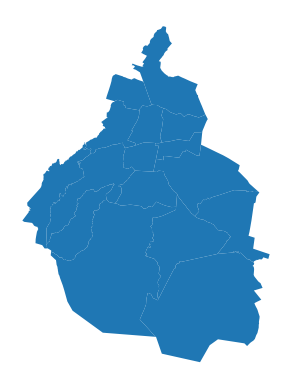

In [128]:
mapita=mexico_map.plot()
mapita.axis("off")

In [130]:
mexico_map = mexico_map.rename(columns={
    'NOMGEO': 'Ubicación'})
mexico_map

,CVEGEO,CVE_ENT,CVE_MUN,Ubicación,geometry
0,09002,09,002,Azcapotzalco,"POLYGON ((-99.18231 19.50748, -99.18229 19.507..."
1,09003,09,003,Coyoacán,"POLYGON ((-99.13427 19.35654, -99.13397 19.356..."
2,09004,09,004,Cuajimalpa de Morelos,"POLYGON ((-99.25738 19.40112, -99.25698 19.400..."
3,09005,09,005,Gustavo A. Madero,"POLYGON ((-99.11124 19.56150, -99.11485 19.557..."
4,09006,09,006,Iztacalco,"POLYGON ((-99.05751 19.40673, -99.05753 19.406..."
5,09007,09,007,Iztapalapa,"POLYGON ((-99.01692 19.38187, -99.01652 19.381..."
6,09008,09,008,La Magdalena Contreras,"POLYGON ((-99.20819 19.33674, -99.20859 19.336..."
7,09009,09,009,Milpa Alta,"POLYGON ((-98.99718 19.22747, -98.99723 19.227..."
8,09010,09,010,Álvaro Obregón,"POLYGON ((-99.18906 19.39559, -99.18871 19.394..."
9,09011,09,011,Tláhuac,"POLYGON ((-98.97881 19.32392, -98.97856 19.323..."


In [132]:
cdmx_map = pd.merge(mexico_map, df_info_alcaldia, on="Ubicación", how="left")

In [134]:
cdmx_ord = cdmx_map.sort_values(by='Promedio', ascending=False)
cdmx_ord.head(16)

,CVEGEO,CVE_ENT,CVE_MUN,Ubicación,geometry,Promedio,Cantidad
14,09016,09,016,Miguel Hidalgo,"POLYGON ((-99.19045 19.47044, -99.19058 19.467...",12310296.20,1052
2,09004,09,004,Cuajimalpa de Morelos,"POLYGON ((-99.25738 19.40112, -99.25698 19.400...",10868668.28,911
8,09010,09,010,Álvaro Obregón,"POLYGON ((-99.18906 19.39559, -99.18871 19.394...",10807700.03,1098
6,09008,09,008,La Magdalena Contreras,"POLYGON ((-99.20819 19.33674, -99.20859 19.336...",10484579.09,266
10,09012,09,012,Tlalpan,"POLYGON ((-99.19671 19.30240, -99.19629 19.302...",9583865.24,507
1,09003,09,003,Coyoacán,"POLYGON ((-99.13427 19.35654, -99.13397 19.356...",8826408.32,497
13,09015,09,015,Cuauhtémoc,"POLYGON ((-99.12951 19.46265, -99.12919 19.462...",6845304.54,815
12,09014,09,014,Benito Juárez,"POLYGON ((-99.14762 19.40401, -99.14681 19.403...",6146293.83,1507
7,09009,09,009,Milpa Alta,"POLYGON ((-98.99718 19.22747, -98.99723 19.227...",5830000.00,3
11,09013,09,013,Xochimilco,"POLYGON ((-99.09880 19.32045, -99.09870 19.319...",5825803.00,100


(-99.38615526917448, -98.91907175142356, 19.02101062916438, 19.6199833107845)

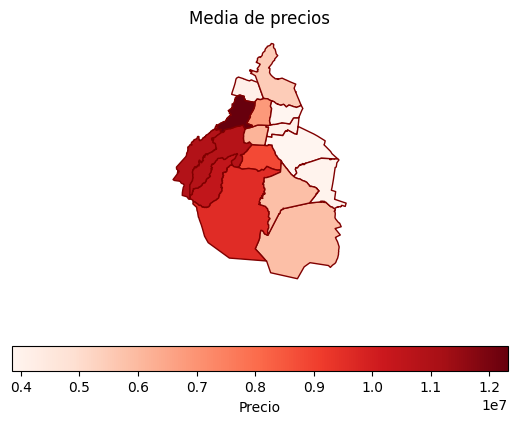

In [136]:
#Gráfica del promedio de los precios en las casas 
plt = cdmx_map.plot(column = 'Promedio', cmap = 'Reds', edgecolor = 'maroon',
               legend = True, legend_kwds = {'label': 'Precio', 'orientation' : 'horizontal'})
plt.set_title('Media de precios')
plt.axis('off')

(-99.38615526917448, -98.91907175142356, 19.02101062916438, 19.6199833107845)

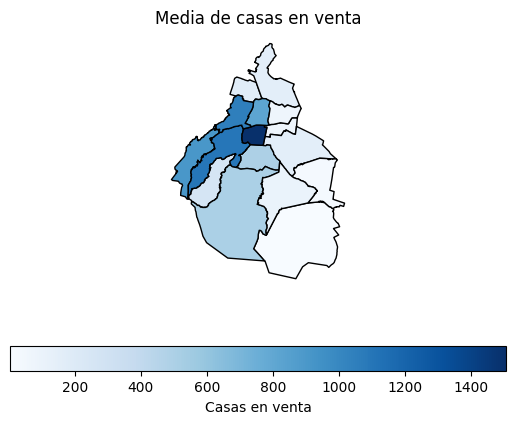

In [140]:
#Graficar ahora el total de las casa vendidas 
plt = cdmx_map.plot(column = 'Cantidad', cmap = 'Blues', edgecolor = 'black',
               legend = True, legend_kwds = {'label': 'Casas en venta', 'orientation' : 'horizontal'})
plt.set_title('Media de casas en venta')
plt.axis("off")

In [178]:
df_filtro_alcaldia = df1[df1['Ubicación'] == 'Benito Juárez']

,Valor,m² construcción,Cuartos,Baños,Estacionamientos,Ubicación
4,4300000,104,2,2,2,Benito Juárez
7,4472000,85,2,2,1,Benito Juárez
11,10300000,270,4,3,3,Benito Juárez
37,2670000,65,2,2,1,Benito Juárez
38,2781257,71,2,1,1,Benito Juárez
...,...,...,...,...,...,...
12183,9800000,288,4,3,4,Benito Juárez
12186,13800000,362,4,3,3,Benito Juárez
12226,14500000,419,4,3,3,Benito Juárez
12227,9900000,287,4,2,1,Benito Juárez


In [180]:
df_filtro_alcaldia = df_filtro_alcaldia.reset_index(drop=True)
df_filtro_alcaldia

,Valor,m² construcción,Cuartos,Baños,Estacionamientos,Ubicación
0,4300000,104,2,2,2,Benito Juárez
1,4472000,85,2,2,1,Benito Juárez
2,10300000,270,4,3,3,Benito Juárez
3,2670000,65,2,2,1,Benito Juárez
4,2781257,71,2,1,1,Benito Juárez
...,...,...,...,...,...,...
1502,9800000,288,4,3,4,Benito Juárez
1503,13800000,362,4,3,3,Benito Juárez
1504,14500000,419,4,3,3,Benito Juárez
1505,9900000,287,4,2,1,Benito Juárez


In [182]:
df_filtro_alcaldia.describe()

,Valor,m² construcción,Cuartos,Baños,Estacionamientos
count,1507.00,1507.00,1507.00,1507.00,1507.00
mean,6146293.83,131.26,2.47,2.08,1.62
std,3466754.24,89.54,0.87,0.67,0.88
min,1500000.00,1.00,1.00,1.00,0.00
25%,3922368.00,78.00,2.00,2.00,1.00
50%,5000000.00,101.00,2.00,2.00,2.00
75%,7202500.00,154.00,3.00,2.00,2.00
max,34500000.00,850.00,17.00,6.00,10.00


In [196]:
df2 = df_filtro_alcaldia.select_dtypes(include=['float64', 'int64'])
df2

,Valor,m² construcción,Cuartos,Baños,Estacionamientos
0,4300000,104,2,2,2
1,4472000,85,2,2,1
2,10300000,270,4,3,3
3,2670000,65,2,2,1
4,2781257,71,2,1,1
...,...,...,...,...,...
1502,9800000,288,4,3,4
1503,13800000,362,4,3,3
1504,14500000,419,4,3,3
1505,9900000,287,4,2,1


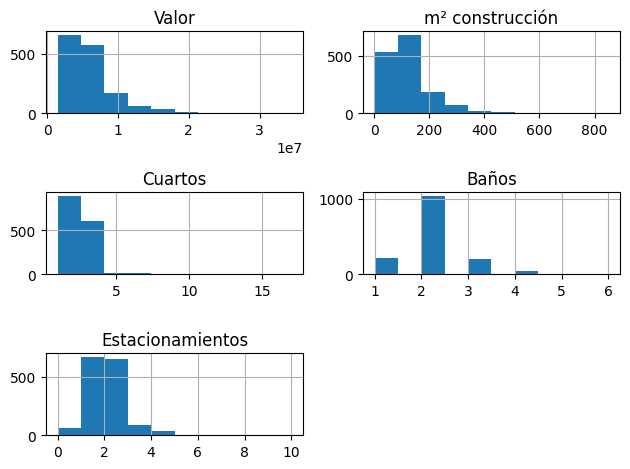

In [259]:
df2.hist()
plt.tight_layout()

In [198]:
matriz = df2.corr(method= "pearson")
matriz

,Valor,m² construcción,Cuartos,Baños,Estacionamientos
Valor,1.00,0.79,0.50,0.59,0.59
m² construcción,0.79,1.00,0.55,0.52,0.47
Cuartos,0.50,0.55,1.00,0.54,0.30
Baños,0.59,0.52,0.54,1.00,0.43
Estacionamientos,0.59,0.47,0.30,0.43,1.00


In [190]:
matriz["Valor"]

Valor              1.00
m² construcción    0.79
Cuartos            0.50
Baños              0.59
Estacionamientos   0.59
Name: Valor, dtype: float64

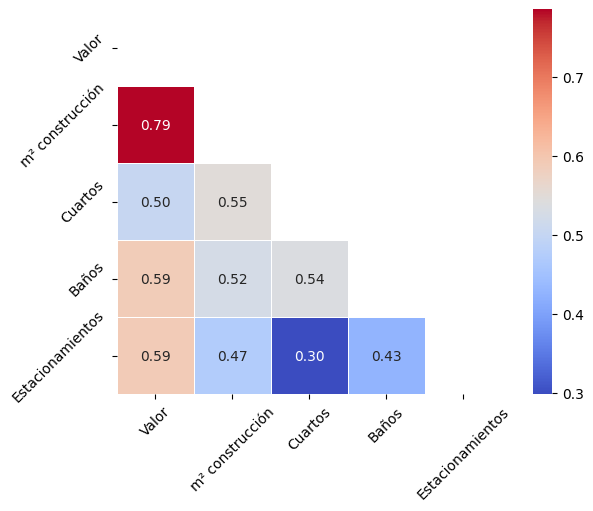

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

mask = np.triu(np.ones_like(matriz, dtype=bool))

plt.figure(figsize=(8, 5))
sns.heatmap(matriz, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
            cbar=True, square=True, linewidths=.5)

plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

# _**<span style="color: red;">Entrenamiendo del modelo</span>**_

#### _<span style="color: blue;">Regresión Lineal</span>_

Error cuadratico medio de cada fold: [1914399.64690999 2112409.38081331 1485767.25864857 2198171.47967642
 2343582.26690786]
Promedio error cuadratico medio: 2010866.0065912288


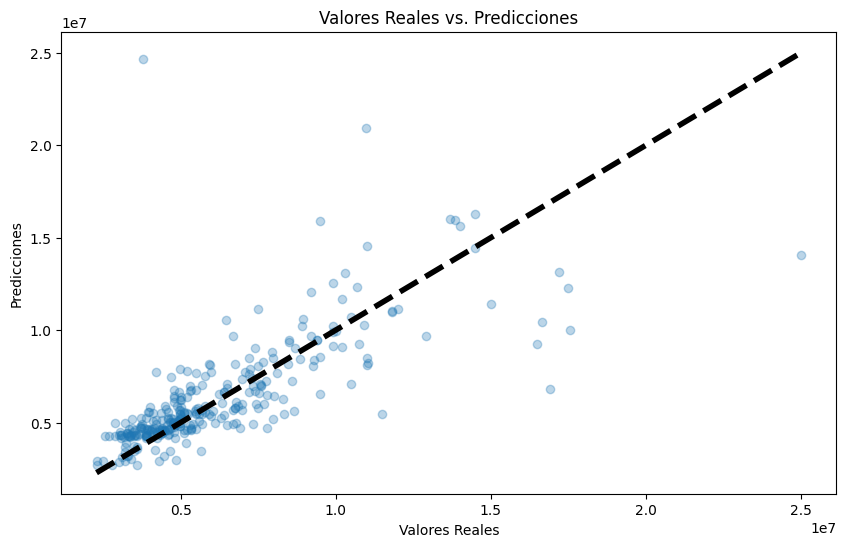

Error cuadratico medio final en el test set: 2221650.8396761585


In [231]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

X = df2[['m² construcción', 'Cuartos', 'Baños']]  # características seleccionadas
y = df2['Valor']  # variable objetivo

# Dividir los datos en conjunto de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un pipeline que incluye la estandarización de los datos y el modelo de regresión lineal
pipeline = make_pipeline(StandardScaler(), LinearRegression())

# Realizar validación cruzada
scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convertir los scores a errores cuadráticos medios positivos para mejor interpretación
mse_scores = np.sqrt(-scores)

print("Error cuadratico medio de cada fold:", mse_scores)
print("Promedio error cuadratico medio:", mse_scores.mean())

# Entrenar el modelo con todos los datos de entrenamiento
pipeline.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de prueba
y_pred = pipeline.predict(X_test)
final_mse = np.sqrt(mean_squared_error(y_test, y_pred))

# Comparar visualmente
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Una línea perfecta para referencia
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs. Predicciones')
plt.show()

# Imprimir métricas finales
print(f"Error cuadratico medio final en el test set: {final_mse}")


#### _<span style="color: blue;">Random Forest</span>_

Error cuadratico medio de cada fold: [1853833.01015679 2149231.24355475 1517850.86041461 2034162.61623441
 2190711.74768933]
Promedio error cuadratico medio: 1949157.895609979


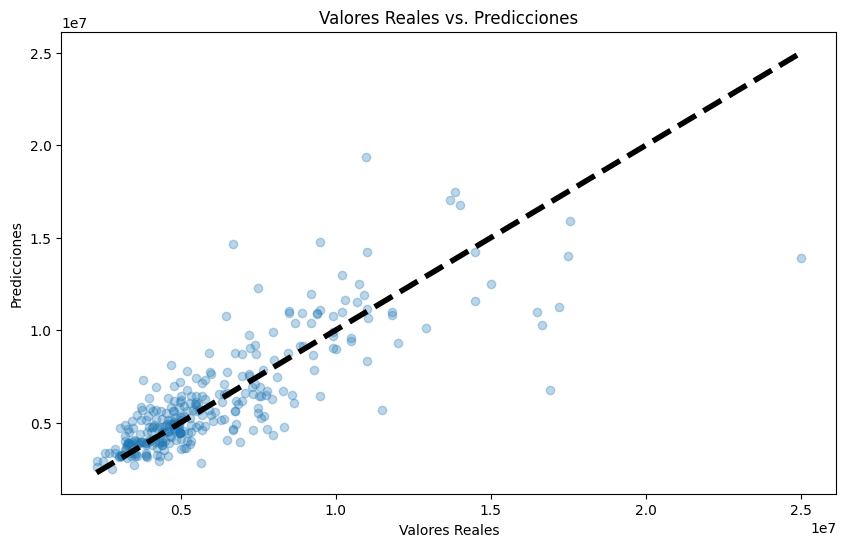

Error cuadratico medio final en el test set: 1885219.294105883


In [235]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Supongamos que df2 es tu DataFrame y ya está limpio y listo para ser usado
X = df2[['m² construcción', 'Cuartos', 'Baños']]  # características seleccionadas
y = df2['Valor']  # variable objetivo

# Dividir los datos en conjunto de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un pipeline que incluye la estandarización de los datos y el modelo Random Forest
pipeline = make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators=100, random_state=42))

# Realizar validación cruzada
scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convertir los scores a errores cuadráticos medios positivos para mejor interpretación
mse_scores = np.sqrt(-scores)
print("Error cuadratico medio de cada fold:", mse_scores)
print("Promedio error cuadratico medio:", mse_scores.mean())

# Entrenar el modelo con todos los datos de entrenamiento
pipeline.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de prueba
y_pred = pipeline.predict(X_test)
final_mse = np.sqrt(mean_squared_error(y_test, y_pred))

# Comparar visualmente
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Una línea perfecta para referencia
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs. Predicciones')
plt.show()

# Imprimir métricas finales
print(f"Error cuadratico medio final en el test set: {final_mse}")
